In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy 
import glob


simroot = uproot.open("/Users/juliogutierrez/Downloads/R-sidis_analysis/ROOTfiles/SIMC/LH2/lh2_3p632gev_7p87deg.root")
datapath = sorted(glob.glob("/Users/juliogutierrez/Downloads/R-sidis_analysis/ROOTfiles/LH2/-3p632gev7p87deg/*.root"))
dummypath = glob.glob("/Users/juliogutierrez/Downloads/R-sidis_analysis/ROOTfiles/dummy/-3p632gev7p87deg/*.root")

simtree = simroot["h10"]

# Simulation trees

hsdelta = simtree["hsdelta"].array(library="np")
# stop_id = simtree["stop_id"].array(library="np")
hsytar = simtree["hsytar"].array(library="np")
hsxptar = simtree["hsxptar"].array(library="np")
hsyptar = simtree["hsyptar"].array(library="np")
hsxpfp = simtree["hsxpfp"].array(library="np")
hsypfp = simtree["hsypfp"].array(library="np")
sweights = simtree["Weight"].array(library="np")

psdelta = simtree["ssdelta"].array(library="np")
# stop_id = simtree["stop_id"].array(library="np")
psytar = simtree["ssytar"].array(library="np")
psxptar = simtree["ssxptar"].array(library="np")
psyptar = simtree["ssyptar"].array(library="np")
psxpfp = simtree["ssxpfp"].array(library="np")
psypfp = simtree["ssypfp"].array(library="np")
sweights = simtree["Weight"].array(library="np")


normfac = 0.838913E+11

charge = [29.635, # 24091
54.682,           # 24092  
52.453,           # 24093
49.218,           # 24094
58.815,           # 24130
52.229,           # 24131
55.358,           # 24150
56.559,           # 24151
54.039,           # 24153
51.032]           # 24155

hEff = [0.9983,
0.9985,
0.9985,
0.9987,
0.9983,
0.9987,
0.9985,
0.9987,
0.9982,
0.9989]

pEff = [0.9524,
0.9515,
0.9503,
0.95,
0.9597,
0.9596,
0.9601,
0.9589,
0.9604,
0.9574]

hDeadT = [0.940222,
0.995209,
0.99518,
0.995221,
0.995182,
0.99514,
0.995097,
0.995123,
0.99516,
0.995133]

pDeadT = [0.997773,
0.999821,
0.99982,
0.999822,
0.99982,
0.999819,
0.999817,
0.999818,
0.999819,
0.999818]

bin_num = 32

hcuts_sim = (hsdelta > -8) & (hsdelta < 8) 
pcuts_sim = (psdelta > -10) & (psdelta < 22)
# pcuts_sim = 

hnentries = len(hsdelta[hcuts_sim])
pnentries = len(psdelta[pcuts_sim])

def histogram(data, weights, bins):
    counts, bin_edges = np.histogram(data,  weights=weights, bins=bins)
    sumw2, _ = np.histogram(data, bins=bins, weights=weights**2)
    errors = np.sqrt(sumw2)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    return bin_centers, counts, errors

# normfac = np.empty_like(charge)

# for i in range(len(normfac)):
#     normfac[i] = 1/(charge[i]*hEff[i]*hDeadT[i])


# all_htardp, all_hxtar, all_hytar, all_htarth, all_htarph, all_hmsCal, all_hxfp, all_hyfp, all_hxpfp, all_hypfp, all_Qtree, all_hcer, all_weights = [], [], [], [], [], [], [], [], [], [], [], [], []

# bin_centers_data, bin_counts_data, data_error = np.like

bin_centers_data = [None] * len(datapath)
bin_counts_data = [None] * len(datapath)
error_data = [None] * len(datapath)
# data_scale = [None] * len(datapath)


for i, file_path in enumerate(datapath):
    file = uproot.open(file_path)
    data_scale = 1/(charge[i]*hEff[i]*hDeadT[i])
    tree = file["T"]

    #LH2 cuts
    htardp = tree["H.gtr.dp"].array(library="np")
    hxtar = tree["H.gtr.x"].array(library="np")
    hytar = tree["H.gtr.y"].array(library="np")
    htarth = tree["H.gtr.th"].array(library="np")
    htarph = tree["H.gtr.ph"].array(library="np")
    hmsCal = tree["H.cal.etottracknorm"].array(library="np")
    hxfp = tree["H.dc.x_fp"].array(library="np")
    hyfp = tree["H.dc.y_fp"].array(library="np")
    hxpfp = tree["H.dc.xp_fp"].array(library="np")
    hypfp = tree["H.dc.yp_fp"].array(library="np")
    Qtree = tree["H.kin.primary.Q2"].array(library="np")
    hcer = tree["H.cer.npeSum"].array(library="np")

    ptardp = tree["P.gtr.dp"].array(library="np")
    pxtar = tree["P.gtr.x"].array(library="np")
    pytar = tree["P.gtr.y"].array(library="np")
    ptarth = tree["P.gtr.th"].array(library="np")
    ptarph = tree["P.gtr.ph"].array(library="np")
    shmsCal = tree["P.cal.etottracknorm"].array(library="np")
    pxfp = tree["P.dc.x_fp"].array(library="np")
    pyfp = tree["P.dc.y_fp"].array(library="np")
    pxpfp = tree["P.dc.xp_fp"].array(library="np")
    pypfp = tree["P.dc.yp_fp"].array(library="np")
    # Qtree = tree["H.kin.primary.Q2"].array(library="np")
    phgcer = tree["P.hgcer.npeSum"].array(library="np")
    pngcer = tree["P.ngcer.npeSum"].array(library="np")
    cuts_data = (htardp > -8) & (htardp < 8) & (hmsCal > 0.7) & (ptardp > -10) & (ptardp < 22) & (hcer > 2) & (shmsCal > 0.7) & (pngcer > 2)
    bin_centers_data[i], bin_counts_data[i],error_data[i] = histogram(htardp[cuts_data], weights=np.full_like(htardp[cuts_data],data_scale), bins=bin_num)



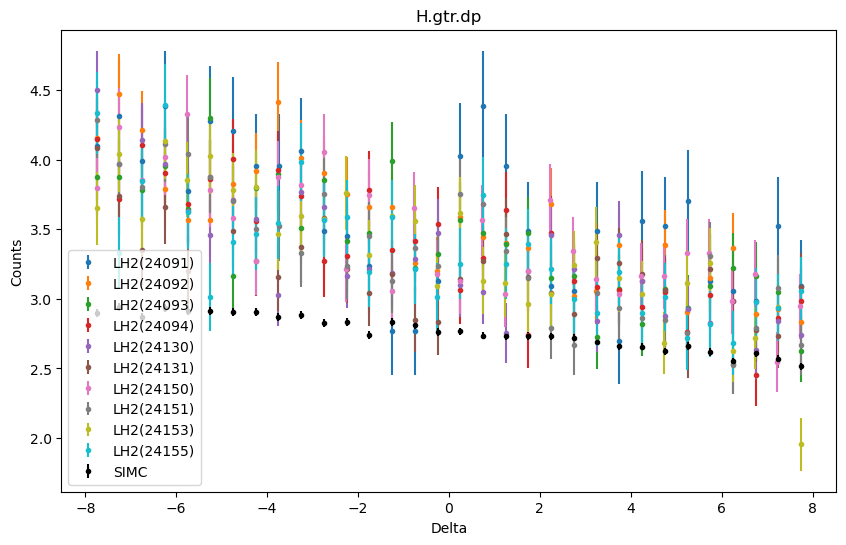

In [2]:
bin_centers_sim, bin_counts_sim, sim_error = histogram(hsdelta[hcuts_sim], weights=sweights[hcuts_sim]*normfac/hnentries, bins=bin_num)

bin_counts_tot = np.sum(bin_counts_data, axis=0) / len(bin_centers_data)
bin_centers_tot = bin_centers_data[0]
# error_tot = np.sqrt(np.sum([error_data[i]**2 for i in range(len(error_data))], axis=0))
error_tot = np.sqrt(np.sum([e**2 for e in error_data], axis=0))

plt.figure(figsize=(10, 6))

plt.errorbar(bin_centers_data[0], bin_counts_data[0],yerr=error_data[0],fmt='.',label='LH2(24091)')
plt.errorbar(bin_centers_data[1], bin_counts_data[1],yerr=error_data[1],fmt='.',label='LH2(24092)')
plt.errorbar(bin_centers_data[2], bin_counts_data[2],yerr=error_data[2],fmt='.',label='LH2(24093)')
plt.errorbar(bin_centers_data[3], bin_counts_data[3],yerr=error_data[3],fmt='.',label='LH2(24094)')
plt.errorbar(bin_centers_data[4], bin_counts_data[4],yerr=error_data[4],fmt='.',label='LH2(24130)')
plt.errorbar(bin_centers_data[5], bin_counts_data[5],yerr=error_data[5],fmt='.',label='LH2(24131)')
plt.errorbar(bin_centers_data[6], bin_counts_data[6],yerr=error_data[6],fmt='.',label='LH2(24150)')
plt.errorbar(bin_centers_data[7], bin_counts_data[7],yerr=error_data[7],fmt='.',label='LH2(24151)')
plt.errorbar(bin_centers_data[8], bin_counts_data[8],yerr=error_data[8],fmt='.',label='LH2(24153)')
plt.errorbar(bin_centers_data[9], bin_counts_data[9],yerr=error_data[9],fmt='.',label='LH2(24155)')
# plt.errorbar(bin_centers_tot, bin_counts_tot,yerr=error_tot,fmt='.',label='LH2')
plt.errorbar(bin_centers_sim, bin_counts_sim,yerr=sim_error,fmt='.', color = 'black',label='SIMC')
# plt.errorbar(bin_centers_sub, bin_counts_sub,yerr=sub_error,fmt='.', color = 'red',label='dummy subtracted LH2')

plt.title("H.gtr.dp")
plt.xlabel("Delta")
plt.ylabel("Counts")
# plt.yscale("log")
plt.legend()

In [4]:

dcharge = [58.3,  # 24116
58.54,            # 24117  
49.804,           # 24171
60.868]           # 24172

dhEff = [0.9984,
0.9985,
0.9986,
0.9987]

dpEff = [0.9623,
0.9643,
0.9626,
0.9627]

dhDeadT = [0.99301,
0.995840,
0.999822,
0.99572]

dpDeadT = [0.999703,
0.999823,
0.999822,
0.999818]

bin_centers_dummy = [None] * len(dummypath)
bin_counts_dummy = [None] * len(dummypath)
error_dummy = [None] * len(dummypath)

# dummy_scale = [None] * len(dummypath)
dhtardp_all = []

for i in range(len(dummypath)):
    dummy_scale = 1/(dcharge[i]*dhEff[i]*dhDeadT[i])

for i, file_path in enumerate(dummypath):
    file = uproot.open(file_path)
    dummytree = file["T"]

    dhtardp = dummytree["H.gtr.dp"].array(library="np")
    dhxtar = dummytree["H.gtr.x"].array(library="np")
    dhytar = dummytree["H.gtr.y"].array(library="np")
    dhtarth = dummytree["H.gtr.th"].array(library="np")
    dhtarph = dummytree["H.gtr.ph"].array(library="np")
    dhmsCal = dummytree["H.cal.etottracknorm"].array(library="np")
    dhxfp = dummytree["H.dc.x_fp"].array(library="np")
    dhyfp = dummytree["H.dc.y_fp"].array(library="np")
    dhxpfp = dummytree["H.dc.xp_fp"].array(library="np")
    dhypfp = dummytree["H.dc.yp_fp"].array(library="np")
    dQtree = dummytree["H.kin.primary.Q2"].array(library="np")
    dhcer = dummytree["H.cer.npeSum"].array(library="np")

    dptardp = dummytree["P.gtr.dp"].array(library="np")
    dpxtar = dummytree["P.gtr.x"].array(library="np")
    dpytar = dummytree["P.gtr.y"].array(library="np")
    dptarth = dummytree["P.gtr.th"].array(library="np")
    dptarph = dummytree["P.gtr.ph"].array(library="np")
    dshmsCal = dummytree["P.cal.etottracknorm"].array(library="np")
    dpxfp = dummytree["P.dc.x_fp"].array(library="np")
    dpyfp = dummytree["P.dc.y_fp"].array(library="np")
    dpxpfp = dummytree["P.dc.xp_fp"].array(library="np")
    dpypfp = dummytree["P.dc.yp_fp"].array(library="np")
    # Qtree = tree["H.kin.primary.Q2"].array(library="np")
    dphgcer = dummytree["P.hgcer.npeSum"].array(library="np")
    dpngcer = dummytree["P.ngcer.npeSum"].array(library="np")
    cuts_dummy = (dhtardp > -8) & (dhtardp < 8) & (dhmsCal > 0.7) & (dptardp > -10) & (dptardp < 22) & (dhcer > 2) & (dshmsCal > 0.7) & (dpngcer >2)
    bin_centers_dummy[i], bin_counts_dummy[i], error_dummy[i] = histogram(dhtardp[cuts_dummy], weights=np.full_like(dhtardp[cuts_dummy],dummy_scale), bins=bin_num)

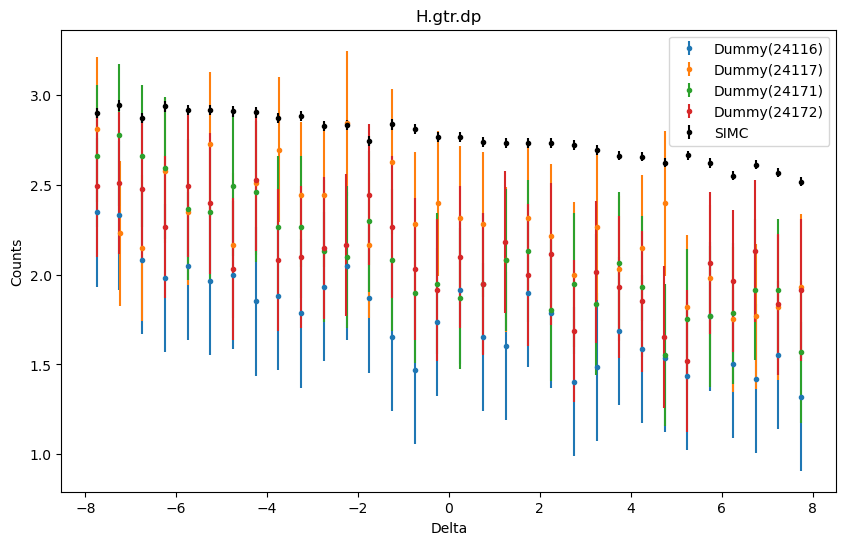

In [5]:
bin_centers_sim, bin_counts_sim, sim_error = histogram(hsdelta[hcuts_sim], weights=sweights[hcuts_sim]*normfac/hnentries, bins=bin_num)

dbin_counts_tot = np.sum(bin_counts_dummy, axis=0) / len(bin_centers_dummy)
dbin_centers_tot = bin_centers_dummy[0]
# error_tot = np.sqrt(np.sum([error_data[i]**2 for i in range(len(error_data))], axis=0))
error_dummy = np.sqrt(np.sum([e**2 for e in error_dummy], axis=0))

plt.figure(figsize=(10, 6))

plt.errorbar(bin_centers_dummy[0], bin_counts_dummy[0],yerr=error_dummy[0],fmt='.',label='Dummy(24116)')
plt.errorbar(bin_centers_dummy[1], bin_counts_dummy[1],yerr=error_dummy[1],fmt='.',label='Dummy(24117)')
plt.errorbar(bin_centers_dummy[2], bin_counts_dummy[2],yerr=error_dummy[2],fmt='.',label='Dummy(24171)')
plt.errorbar(bin_centers_dummy[3], bin_counts_dummy[3],yerr=error_dummy[3],fmt='.',label='Dummy(24172)')
# plt.errorbar(bin_centers_tot, bin_counts_tot,yerr=error_tot,fmt='.',label='LH2')
plt.errorbar(bin_centers_sim, bin_counts_sim,yerr=sim_error,fmt='.', color = 'black',label='SIMC')
# plt.errorbar(bin_centers_sub, bin_counts_sub,yerr=sub_error,fmt='.', color = 'red',label='dummy subtracted LH2')

plt.title("H.gtr.dp")
plt.xlabel("Delta")
plt.ylabel("Counts")
# plt.yscale("log")
plt.legend()